Flight Price Prediction
Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records
FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

Note: You can find the dataset in the link below. 


Downlaod Files:

    https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import stats
import statistics as st

In [7]:
df = pd.read_excel (r'Data_train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

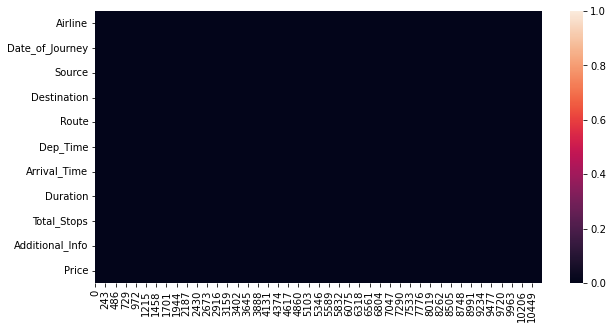

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull().transpose())

In [12]:
df['Total_Stops'].fillna(st.mode(df['Total_Stops']),inplace=True)
df['Route'].fillna(st.mode(df['Route']),inplace=True)

<AxesSubplot:>

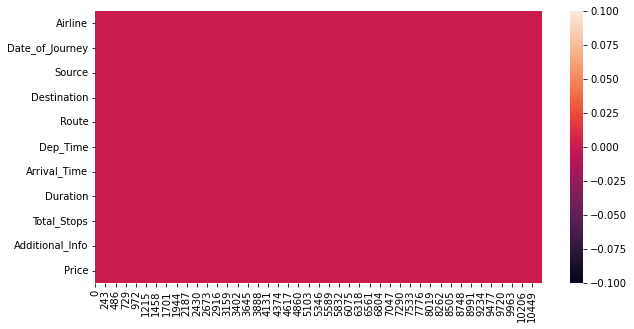

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull().transpose())

In [14]:
for i in df.select_dtypes(['object']).columns:
    print(i,':',df[i].unique())

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey : ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route : ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU →

# Applying Encoder

In [15]:
df.select_dtypes(['object']).columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
col=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']
for i in col:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
    
df['Price'] = df['Price'].astype(float)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897.0
1,1,6,3,0,84,31,906,336,1,8,7662.0
2,4,43,2,1,118,70,413,106,1,8,13882.0
3,3,10,3,0,91,164,1324,311,0,8,6218.0
4,3,0,0,5,29,149,1237,303,0,8,13302.0


# Data Description

In [18]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


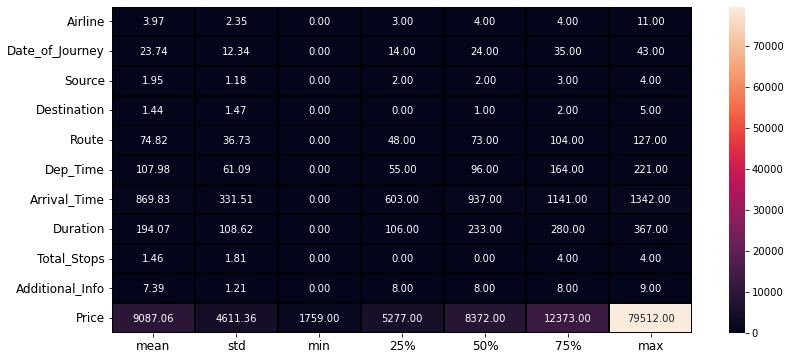

In [19]:
plt.figure(figsize=(13,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Correlation

In [20]:
df.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025118,-0.039439,-0.015733,0.027917,0.036064,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275181,-0.007836,-0.012507,-0.001168,-0.044152,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403403,0.055191,0.020844,-0.192009,-0.225601,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461183,-0.063608,-0.036830,0.022037,0.337883,0.026806,-0.071112
Route,0.025118,0.275181,0.403403,-0.461183,1.000000,-0.082051,0.010560,-0.062097,-0.437783,0.035188,0.164118
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082051,1.000000,-0.023294,0.041619,0.044687,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010560,-0.023294,1.000000,0.027746,-0.097132,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062097,0.041619,0.027746,1.000000,0.175207,0.080151,-0.144270
Total_Stops,0.036064,-0.044152,-0.225601,0.337883,-0.437783,0.044687,-0.097132,0.175207,1.000000,0.164009,-0.571174
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035188,-0.052853,0.017505,0.080151,0.164009,1.000000,-0.065478


<AxesSubplot:>

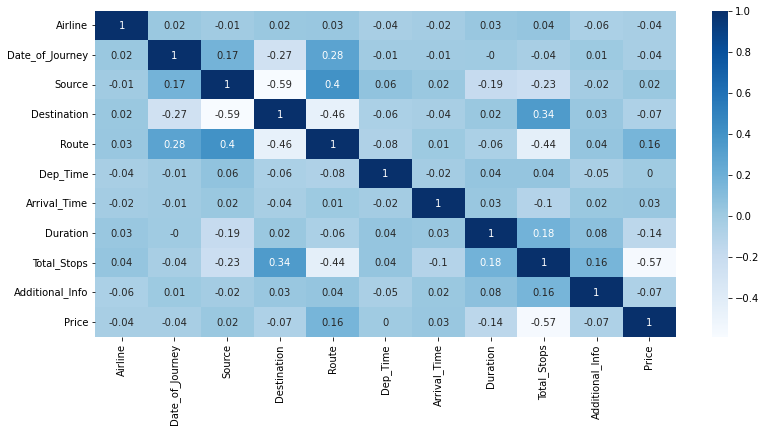

In [21]:
plt.figure(figsize=(13,6))
sns.heatmap(round(df.corr(),2),cmap='Blues',annot=True)

In [22]:
df.corr()['Price']

Airline           -0.039520
Date_of_Journey   -0.036942
Source             0.015998
Destination       -0.071112
Route              0.164118
Dep_Time           0.002949
Arrival_Time       0.027377
Duration          -0.144270
Total_Stops       -0.571174
Additional_Info   -0.065478
Price              1.000000
Name: Price, dtype: float64

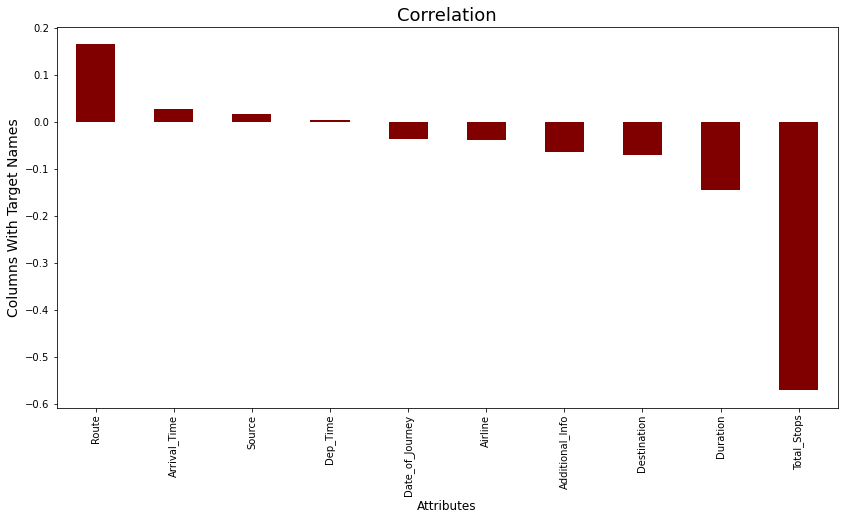

In [23]:
plt.figure(figsize=(14,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='maroon')
plt.xlabel('Attributes',fontsize=12)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Outliers

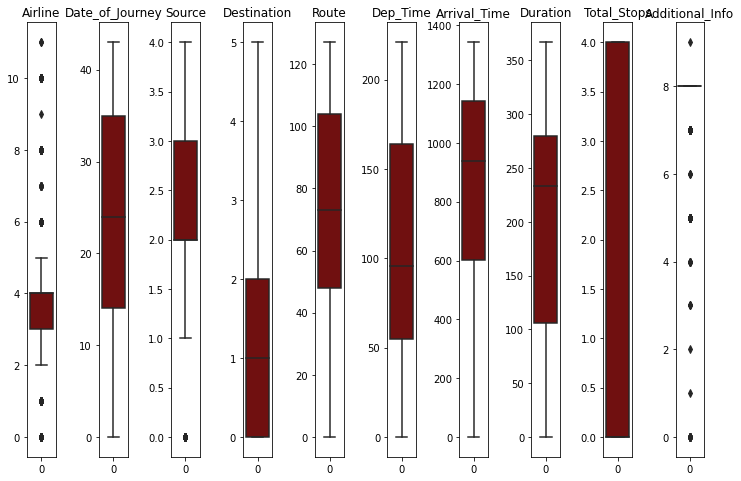

In [24]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    plt.title(df.columns[i])
    sns.boxplot(data=df[collist[i]],color='maroon',orient='v')
    plt.tight_layout()

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['Price'],axis=1)))
z.shape

(10683, 10)

In [26]:
threshold=3
np.where(z>3)

(array([  785,  1043,  2079,  2405,  2481,  2495,  2556,  2924,  3032,
         3111,  3700,  3788,  4521,  5013,  5372,  5628,  6024,  6336,
         6576,  7724,  8957,  9019,  9657, 10364, 10511], dtype=int64),
 array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9], dtype=int64))

In [27]:
len(np.where(z>3)[0])

25

In [28]:
df_new=df[(z<3).all(axis=1)]

In [29]:
df_new.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897.0
1,1,6,3,0,84,31,906,336,1,8,7662.0
2,4,43,2,1,118,70,413,106,1,8,13882.0
3,3,10,3,0,91,164,1324,311,0,8,6218.0
4,3,0,0,5,29,149,1237,303,0,8,13302.0


In [30]:
print('Data Lost: ',round(((len(df)-len(df_new))*100)/len(df),2),'%')

Data Lost:  0.23 %


In [31]:
x=df_new.drop(['Price'],axis=1)
y=df_new['Price']

# Skew

In [32]:
x.skew()

Airline            0.730983
Date_of_Journey   -0.068482
Source            -0.428406
Destination        1.251676
Route             -0.505360
Dep_Time           0.194788
Arrival_Time      -0.607645
Duration          -0.215263
Total_Stops        0.628056
Additional_Info   -1.544976
dtype: float64

In [33]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [34]:
x.skew()

Airline           -0.015259
Date_of_Journey   -0.224398
Source            -0.236939
Destination        0.041303
Route             -0.441450
Dep_Time          -0.150661
Arrival_Time      -0.382551
Duration          -0.391323
Total_Stops        0.322651
Additional_Info   -1.372996
dtype: float64

# Selecting Best Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [36]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc," on Random State: ",maxRS)

At random state 0,the training accuracy is:- 0.27864137392400457
At random state 0,the testing accuracy is:- 0.24509891798093086


At random state 1,the training accuracy is:- 0.270329289515314
At random state 1,the testing accuracy is:- 0.277649073661849


At random state 2,the training accuracy is:- 0.27221272052596335
At random state 2,the testing accuracy is:- 0.2707798682249366


At random state 3,the training accuracy is:- 0.2727229649972084
At random state 3,the testing accuracy is:- 0.269094410997729


At random state 4,the training accuracy is:- 0.27861764157115176
At random state 4,the testing accuracy is:- 0.24588625151920906


At random state 5,the training accuracy is:- 0.2675277617286367
At random state 5,the testing accuracy is:- 0.28897387486732784


At random state 6,the training accuracy is:- 0.2776115493487179
At random state 6,the testing accuracy is:- 0.24891678188700062


At random state 7,the training accuracy is:- 0.270526761782209
At random state 7,the testing 

At random state 63,the testing accuracy is:- 0.28062191395786007


At random state 64,the training accuracy is:- 0.26762066916796945
At random state 64,the testing accuracy is:- 0.2874376106820119


At random state 65,the training accuracy is:- 0.270710912420566
At random state 65,the testing accuracy is:- 0.27738322533936743


At random state 66,the training accuracy is:- 0.2819395290152166
At random state 66,the testing accuracy is:- 0.23114779701738353


At random state 67,the training accuracy is:- 0.2703087504518463
At random state 67,the testing accuracy is:- 0.2786780214780257


At random state 68,the training accuracy is:- 0.2701820483552593
At random state 68,the testing accuracy is:- 0.2794100819718792


At random state 69,the training accuracy is:- 0.26691329172326206
At random state 69,the testing accuracy is:- 0.294449469909439


At random state 70,the training accuracy is:- 0.27903819086230053
At random state 70,the testing accuracy is:- 0.2452283164174771


At random sta

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

kmaxAcc=0
kmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(features_train,target_train)
    pred_train=knr.predict(features_train)
    pred_test=knr.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>kmaxAcc):
        kmaxAcc=acc
        kmaxRS=i
print("Best accuracy: ",kmaxAcc," on Random State: ",kmaxRS)

Best accuracy:  0.7669425401107879  on Random State:  98


In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

dmaxAcc=0
dmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(features_train,target_train)
    pred_train=dtr.predict(features_train)
    pred_test=dtr.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>dmaxAcc):
        dmaxAcc=acc
        dmaxRS=i
print("Best accuracy: ",dmaxAcc," on Random State: ",dmaxRS)

Best accuracy:  0.8713063786213094  on Random State:  67


In [39]:
from sklearn.svm import SVR
sv=SVR(kernel='linear')

smaxAcc=0
smaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    sv.fit(features_train,target_train)
    pred_train=sv.predict(features_train)
    pred_test=sv.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>smaxAcc):
        smaxAcc=acc
        smaxRS=i
print("Best accuracy: ",smaxAcc," on Random State: ",smaxRS)

Best accuracy:  0.23161766904217296  on Random State:  46


In [40]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knr,x,y,cv=5)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7140707170158084


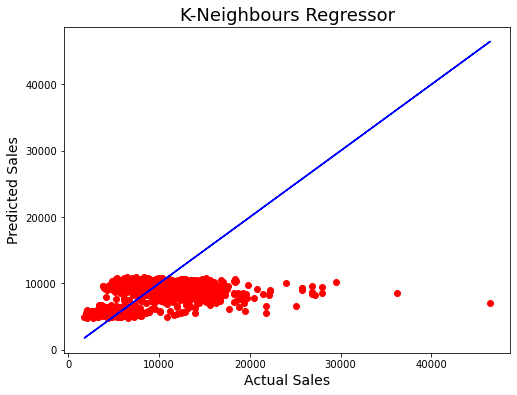

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('K-Neighbours Regressor',fontsize=18)
plt.show()

In [42]:
import joblib
joblib.dump(knr,'Minimum Temperature Forecast Model.pkl')

['Minimum Temperature Forecast Model.pkl']